# Practicas 1 y 2
Análisis exploratorio, limpieza de datos, transformación de datos, ingeniería de caracteristicas

*   Roberto Brito Mejia
*   5AV1
*   Licenciatura en Ciencia de Datos
*   Analítica y Visualización de Datos
*   15/03/2025


In [121]:
# Descarga del datset: Cars4U Dataset en Kaggle
# El archivo se subio a Google Colab
# Leer los datos con Pandas
import pandas as pd
# Cargar el dataset
df = pd.read_csv('/used_cars_data.csv')
# Mostrar el dataset
print(df)


      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

# 1. Análisis exploratorio de datos (EDA, Exploratiry Data Analysis)


## Datos generales

In [122]:
# Indicar caracteristicas de cada una de las simensiones del datatset
# Ver la cantidad de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")

print("Tipos de datos: ")
print(df.dtypes)

# Caracteristicas de las dimensiones: columna, descripcion, tipo de dato
column_info = {
    "S.No.": ["Número de serie del registro", df["S.No."].dtype, "Numérica (ID)"], # Corregido:  "S. No." -> "S.No."
    "Name": ["Nombre del modelo del automóvil", df["Name"].dtype, "Categórica"],
    "Location": ["Ciudad donde se encuentra el automóvil en venta", df["Location"].dtype, "Categórica"],
    "Year": ["Año de fabricación del automóvil", df["Year"].dtype, "Numérica"],
    "Kilometers_Driven": ["Kilómetros recorridos por el automóvil", df["Kilometers_Driven"].dtype, "Numérica"], # Fixed: Changed "Kilometers Driven" to "Kilometers_Driven"
    "Fuel_Type": ["Tipo de combustible usado", df["Fuel_Type"].dtype, "Categórica"], # Fixed: Changed "Fuel Type" to "Fuel_Type"
    "Transmission": ["Tipo de transmisión (Manual/Automática)", df["Transmission"].dtype, "Categórica"],
    "Owner_Type": ["Número de propietarios previos", df["Owner_Type"].dtype, "Categórica"], # Fixed: Changed "Owner Type" to "Owner_Type"
    "Mileage": ["Rendimiento de combustible (km/l o mpg)", df["Mileage"].dtype, "Mixta (Numérica + Texto)"],
    "Engine": ["Cilindraje del motor (ej. 1197 cc)", df["Engine"].dtype, "Mixta (Numérica + Texto)"],
    "Power": ["Potencia del motor en caballos de fuerza (bhp)", df["Power"].dtype, "Mixta (Numérica + Texto)"],
    "Seats": ["Número de asientos del automóvil", df["Seats"].dtype, "Numérica"],
    "New_Price": ["Precio original del automóvil cuando era nuevo", df["New_Price"].dtype, "Categórica (Muchos valores nulos)"], # Fixed: Changed "New Price" to "New_Price"
    "Price": ["Precio actual del automóvil en el mercado de autos usados", df["Price"].dtype, "Numérica"]
}

# Convertir en DataFrame para mejor visualización
df_info = pd.DataFrame.from_dict(column_info, orient="index", columns=["Descripción", "Tipo de Dato", "Categoría"])

print(df_info)

# Mostrar los primeros 10 registros
print("Primeros 10 registros del dataset:\n")
display(df.head(10))

# Mostrar los últimos 10 registros
print("\nÚltimos 10 registros del dataset:\n")
display(df.tail(10))


El dataset tiene 7253 filas y 14 columnas.

Tipos de datos: 
S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object
                                                         Descripción  \
S.No.                                   Número de serie del registro   
Name                                 Nombre del modelo del automóvil   
Location             Ciudad donde se encuentra el automóvil en venta   
Year                                Año de fabricación del automóvil   
Kilometers_Driven             Kilómetros recorridos por el automóvil   
Fuel_Type                                  Tipo de combustible usado   
Transmission   

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95



Últimos 10 registros del dataset:



,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7243,7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,NaN,NaN
7244,7244,Chevrolet Aveo 1.4 LS,Pune,2009,45463,Petrol,Manual,First,14.49 kmpl,1399 CC,92.7 bhp,5.0,NaN,NaN
7245,7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,NaN
7246,7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,NaN
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,NaN
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


## Análisis numérico

In [123]:
# Seleccionar solo columnas numéricas
col_numericas = ["Year", "Kilometers_Driven", "Seats", "Price"]
# Calcular estadísticas descriptivas
estadisticas = df[col_numericas].describe().T
# Calcular la moda
modas = df[col_numericas].mode().iloc[0]
# Calcular el rango con la visualización de la resta
rangos = estadisticas["max"] - estadisticas["min"]
estadisticas["Rango"] = estadisticas["max"].astype(str) + " - " + estadisticas["min"].astype(str) + " = " + rangos.astype(str)
# Agregar la moda a la tabla
estadisticas["Moda"] = modas
# Mostrar resultados
print("Análisis Numérico del Dataset:\n")
print(estadisticas)



Análisis Numérico del Dataset:

                    count          mean           std      min      25%  \
Year               7253.0   2013.365366      3.254421  1996.00   2011.0   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.0   
Seats              7200.0      5.279722      0.811660     0.00      5.0   
Price              6019.0      9.479468     11.187917     0.44      3.5   

                        50%       75%        max  \
Year                2014.00   2016.00     2019.0   
Kilometers_Driven  53416.00  73000.00  6500000.0   
Seats                  5.00      5.00       10.0   
Price                  5.64      9.95      160.0   

                                           Rango     Moda  
Year                      2019.0 - 1996.0 = 23.0   2015.0  
Kilometers_Driven  6500000.0 - 171.0 = 6499829.0  60000.0  
Seats                          10.0 - 0.0 = 10.0      5.0  
Price                      160.0 - 0.44 = 159.56      4.5  


In [124]:
# Identifir de cantidad y porcentajes de valores nulos

# Contar valores nulos
valores_nulos = df.isnull().sum()
# Calcular el porcentaje de valores nulos
porcentaje_nulos = (valores_nulos / len(df)) * 100
# Crear un DataFrame con los resultados
analisis_nulos = pd.DataFrame({
    "Valores Nulos": valores_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos.round(2)
})
# Mostrar los resultados
print("Análisis de Valores Nulos en el Dataset:\n")
print(analisis_nulos)



Análisis de Valores Nulos en el Dataset:

                   Valores Nulos  Porcentaje Nulos (%)
S.No.                          0                  0.00
Name                           0                  0.00
Location                       0                  0.00
Year                           0                  0.00
Kilometers_Driven              0                  0.00
Fuel_Type                      0                  0.00
Transmission                   0                  0.00
Owner_Type                     0                  0.00
Mileage                        2                  0.03
Engine                        46                  0.63
Power                         46                  0.63
Seats                         53                  0.73
New_Price                   6247                 86.13
Price                       1234                 17.01


In [125]:
# Identificar la cantidad de valores duplicados

# Contar registros duplicados
duplicados_totales = df.duplicated().sum()
# Calcular el porcentaje de duplicados
porcentaje_duplicados = (duplicados_totales / len(df)) * 100

# Mostrar resultados
print("Análisis de Valores Duplicados en el Dataset:\n")
print(f"Total de registros duplicados: {duplicados_totales}")
print(f"Porcentaje de registros duplicados: {porcentaje_duplicados:.2f}%")


Análisis de Valores Duplicados en el Dataset:

Total de registros duplicados: 0
Porcentaje de registros duplicados: 0.00%


## Análisis gráfico

Graficar la distribución de cada una de las dimensiones numéricas.

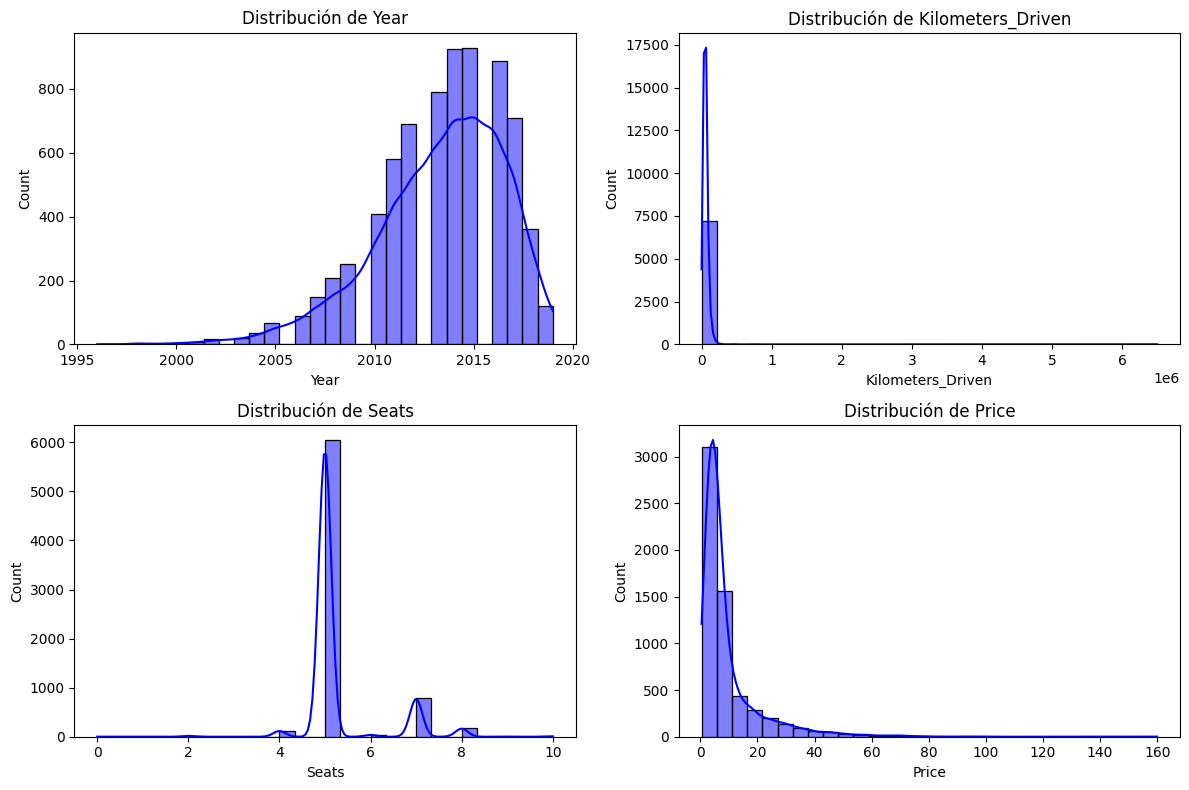

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Graficar cada variable numérica con histograma + curva de densidad
for i, columna in enumerate(col_numericas):
    plt.subplot(2, 2, i + 1)  # Crear subgráficos (2 filas, 2 columnas)
    sns.histplot(df[columna], kde=True, bins=30, color="blue", edgecolor="black")  # Histogramas con KDE
    plt.title(f"Distribución de {columna}")  # Título de cada gráfico

# Ajustar el diseño
plt.tight_layout()
plt.show()


Comparar entre sí cada una de las dimensiones numéricas (análisis bivariado) con un gráfico del tipo “pairplot”.

Análisis Bivariado: Comparación entre Variables Numéricas



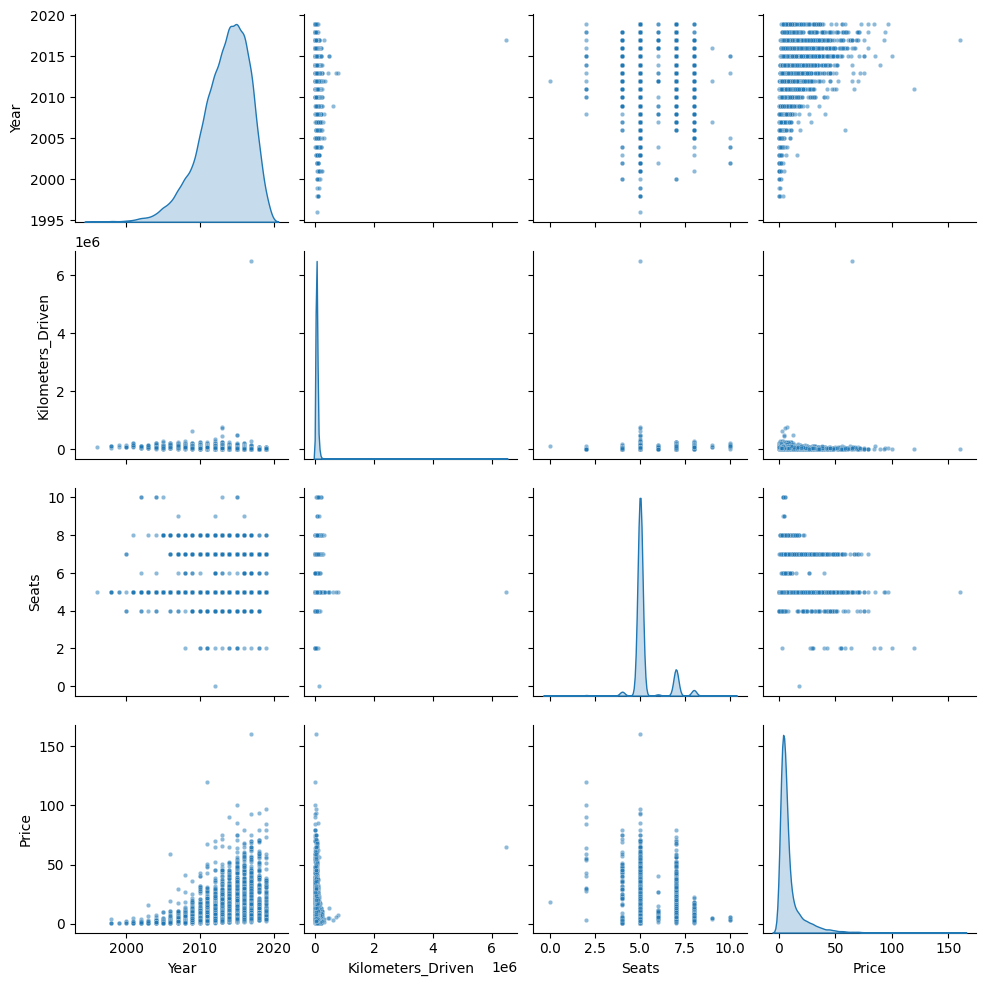

In [127]:
# Crear pairplot con las variables numéricas
print("Análisis Bivariado: Comparación entre Variables Numéricas\n")
sns.pairplot(df[col_numericas], diag_kind="kde", plot_kws={'alpha': 0.5, 's': 10})  # Diagonal con densidad

# Mostrar gráfico
plt.show()


Realizar un mapa de calor para identificar la correlación entre todas las variables
numericas (análisis multivariado).

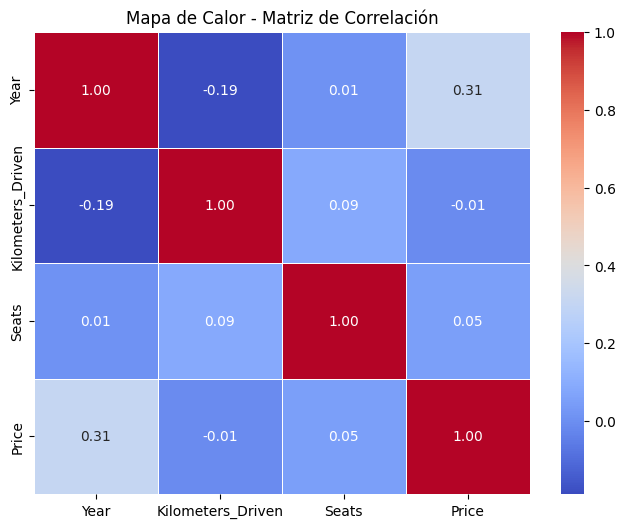

In [128]:
# Calcular la matriz de correlación
matriz_correlacion = df[col_numericas].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Configurar título
plt.title("Mapa de Calor - Matriz de Correlación")

# Mostrar gráfico
plt.show()


Graficar la distribución de cada una de las dimensiones categóricas.

<ipython-input-129-ca2079f1489c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], palette="viridis", order=df[columna].value_counts().index)
<ipython-input-129-ca2079f1489c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], palette="viridis", order=df[columna].value_counts().index)
<ipython-input-129-ca2079f1489c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[columna], palette="viridis", order=df[columna].value_counts().index)
<ipython-input-129-ca2079f1489c>:12: FutureWarning: 

Passing `palette

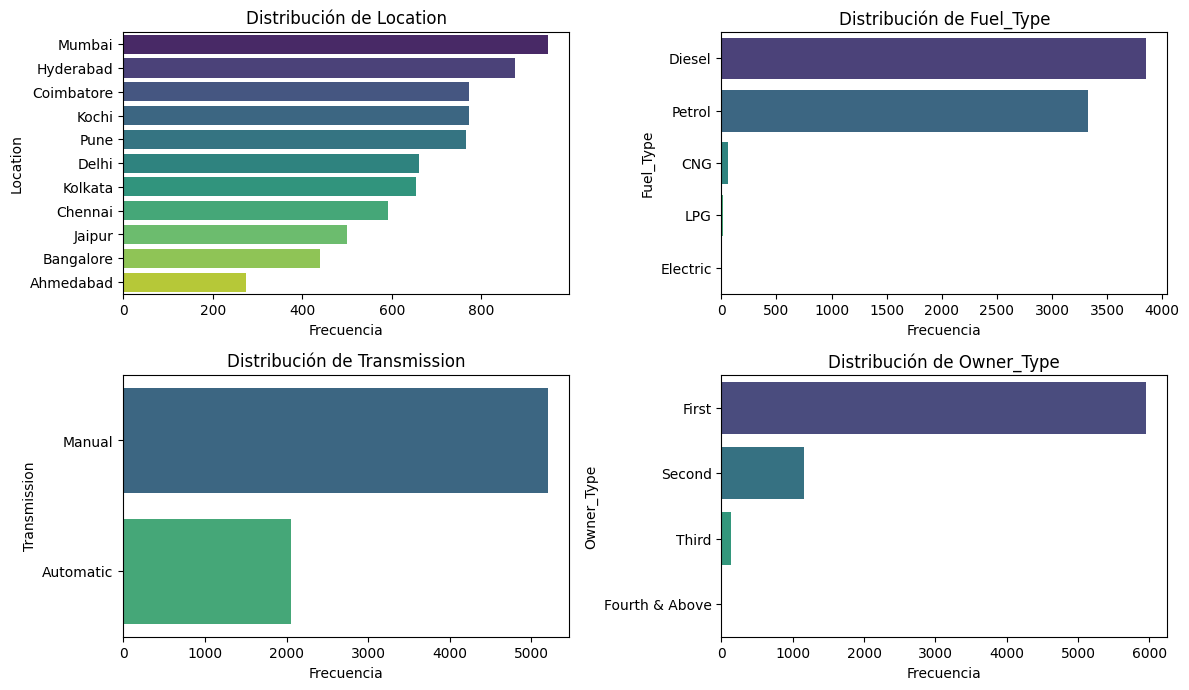

In [129]:
# Definir las columnas categóricas

# No se tomara en cuenta la dimension de nombre
col_categoricas = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear gráficos de barras para cada variable categórica
for i, columna in enumerate(col_categoricas):
    plt.subplot(3, 2, i + 1)  # Crear subgráficos
    sns.countplot(y=df[columna], palette="viridis", order=df[columna].value_counts().index)
    plt.title(f"Distribución de {columna}")
    plt.xlabel("Frecuencia")
    plt.ylabel(columna)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Comparar cada una de las dimensiones categóricas (eje X) contra la dimensión “Precio” (eje Y). Para ello se debe primero agrupar por categoría, después obtener la media de la respectiva dimensión y ordenar los valores de mayor a menor. Un ejemplo de la salida esperada para la dimensión “Combustible” se muestra a continuación:

<ipython-input-130-b0244c4b7cb7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_precio.index, y=promedio_precio.values, palette="magma")
<ipython-input-130-b0244c4b7cb7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_precio.index, y=promedio_precio.values, palette="magma")
<ipython-input-130-b0244c4b7cb7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_precio.index, y=promedio_precio.values, palette="magma")
<ipython-input-130-b0244c4b7cb7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is

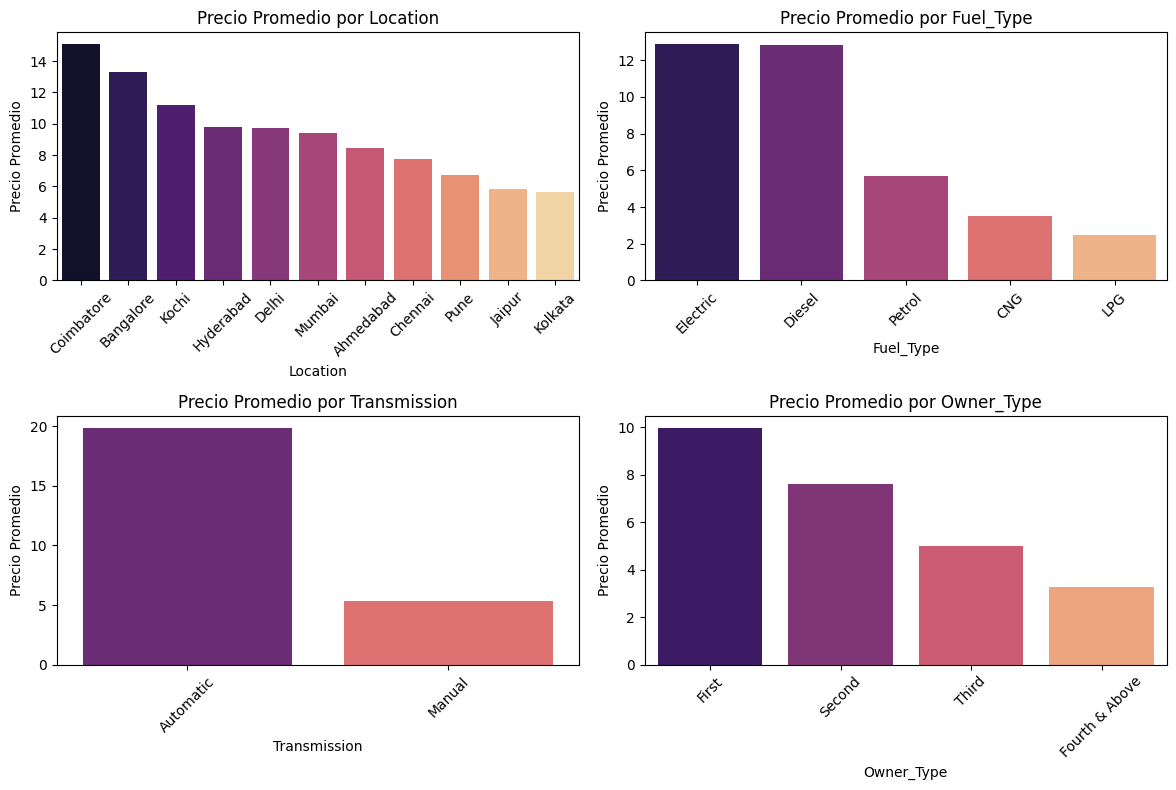

In [130]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear gráficos de barras para cada variable categórica vs Precio
for i, columna in enumerate(col_categoricas):
    plt.subplot(2, 2, i + 1)  # Subgráficos (2 filas, 2 columnas)
    promedio_precio = df.groupby(columna)["Price"].mean().sort_values(ascending=False)  # Agrupar y ordenar
    sns.barplot(x=promedio_precio.index, y=promedio_precio.values, palette="magma")
    plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
    plt.title(f"Precio Promedio por {columna}")
    plt.xlabel(columna)
    plt.ylabel("Precio Promedio")

# Ajustar el diseño
plt.tight_layout()
plt.show()

# 2. Limpieza de datos

a. Eliminar las dimensiones “S. No.” y “New Price”.

In [131]:
# Eliminar las columnas innecesarias
df = df.drop(columns=["S.No.", "New_Price"])

# Confirmar la eliminación
print("Columnas restantes en el dataset después de la eliminación:\n")
print(df.columns)


Columnas restantes en el dataset después de la eliminación:

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


b. Sustituir el nombre en inglés de cada dimensión por su traducción en español.

In [132]:
# Diccionario con los nuevos nombres
nombres_columnas = {
    "Name": "Modelo",
    "Location": "Ubicación",
    "Year": "Año",
    "Kilometers_Driven": "Kilómetros_Recorridos",
    "Fuel_Type": "Tipo_Combustible",
    "Transmission": "Transmisión",
    "Owner_Type": "Tipo_Propietario",
    "Mileage": "Rendimiento",
    "Engine": "Motor",
    "Power": "Potencia",
    "Seats": "Asientos",
    "Price": "Precio"
}

# Renombrar las columnas
df = df.rename(columns=nombres_columnas)

# Confirmar los cambios
print("Nombres de columnas después de la renombración:\n")
print(df.columns)


Nombres de columnas después de la renombración:

Index(['Modelo', 'Ubicación', 'Año', 'Kilómetros_Recorridos',
       'Tipo_Combustible', 'Transmisión', 'Tipo_Propietario', 'Rendimiento',
       'Motor', 'Potencia', 'Asientos', 'Precio'],
      dtype='object')


c. Eliminar todas las observaciones que únicamente tengan valores nulos en la
dimensión “Asientos”.

In [133]:
# Eliminar filas donde "Asientos" tenga valores nulos
df = df.dropna(subset=["Asientos"])
# Verificar si quedan valores nulos
print("Valores nulos después de la limpieza:\n")
print(df.isnull().sum())

Valores nulos después de la limpieza:

Modelo                      0
Ubicación                   0
Año                         0
Kilómetros_Recorridos       0
Tipo_Combustible            0
Transmisión                 0
Tipo_Propietario            0
Rendimiento                 2
Motor                       0
Potencia                    0
Asientos                    0
Precio                   1223
dtype: int64


Sustituir todos los valores nulos en la dimensión “Millaje” por la media de la dimensión.

In [134]:
# Sustituir valores nulos en "Rendimiento" con la media de la columna

# df["Rendimiento"] = df["Rendimiento"].fillna(df["Rendimiento"].mean())

"""Este codigo genera un error ya que la variable rendimiento no es totalmente
"numerica", es una variable mixta que contiene caracteres
"""


'Este codigo genera un error ya que la variable rendimiento no es totalmente\n"numerica", es una variable mixta que contiene caracteres \n'

Sustituir todos los valores nulos en la dimensión “Motor” por la moda de la
dimensión.

In [135]:
# Sustituir valores nulos en "Motor" con la moda de la columna
moda_motor = df["Motor"].mode()[0]  # Obtener la moda
df["Motor"] = df["Motor"].fillna(moda_motor)


# 3. Transformacion de datos

Sustituir los registros que contengan las siguientes palabras en la dimensión
“Nombre” por la respectiva cadena sustituto: "ISUZU" por "Isuzu", "Mini" por
"MiniCooper", y "Land" por "LandRover".

In [136]:
import numpy as np
import re
# Corregir nombres en la columna "Modelo"
df["Modelo"] = df["Modelo"].replace({"ISUZU": "Isuzu", "Mini": "MiniCooper", "Land": "LandRover"}, regex=True)


* Eliminar los caracteres de las dimensiones“Millas por Galón”, “Motor”, y
“Potencia”.
* Redondear al número entero más cercano los valores de las dimensiones “Millas
por Galón”, “Motor” y “Potencia”.texto en cursiva

Multiplicar por mil los valores en la dimensión “Precio”.

In [149]:
import numpy as np
import re

# Función para limpiar caracteres no numéricos y manejar valores vacíos
def limpiar_numeros(valor):
    if isinstance(valor, str):
        valor_limpio = re.sub(r"[^0-9.]", "", valor)  # Eliminar caracteres no numéricos
        return float(valor_limpio) if valor_limpio else np.nan  # Devolver NaN si la cadena está vacía
    return valor  # Si ya es numérico, devolverlo tal cual

# Aplicar limpieza a las columnas "Rendimiento", "Motor" y "Potencia"
df["Rendimiento"] = df["Rendimiento"].apply(limpiar_numeros)
df["Motor"] = df["Motor"].apply(limpiar_numeros)
df["Potencia"] = df["Potencia"].apply(limpiar_numeros)

# Convertir a enteros y redondear, manejando valores nulos antes de la conversión
df["Rendimiento"] = df["Rendimiento"].fillna(df["Rendimiento"].mean()).round(0).astype("Int64")
df["Motor"] = df["Motor"].fillna(df["Motor"].mode()[0]).round(0).astype("Int64")
df["Potencia"] = df["Potencia"].fillna(df["Potencia"].mode()[0]).round(0).astype("Int64")

print("Redondeo de valores")
print(df.head)

# Verificar si quedan valores nulos
print("Valores nulos después de la transformación:\n")
print(df.isnull().sum())


Redondeo de valores
<bound method NDFrame.head of                                  Modelo   Ubicación   Año  \
0                          WagonRLXICNG      Mumbai  2010   
1                  Creta1.6CRDiSXOption        Pune  2015   
2                                 JazzV     Chennai  2011   
3                             ErtigaVDI     Chennai  2012   
4                A4New2.0TDIMultitronic  Coimbatore  2013   
...                                 ...         ...   ...   
7248               VentoDieselTrendline   Hyderabad  2011   
7249                          PoloGTTSI      Mumbai  2015   
7250                      MicraDieselXV     Kolkata  2012   
7251                          PoloGTTSI        Pune  2013   
7252  E-Class2009-2013E220CDIAvantgarde       Kochi  2014   

      Kilómetros_Recorridos Tipo_Combustible Transmisión Tipo_Propietario  \
0                     72000              CNG      Manual            First   
1                     41000           Diesel      Manual       

Multiplicar por mil los valores en la dimensión “Precio”.

In [152]:
# Ajustar escala del precio
df["Precio"] = df["Precio"] * 1000
print("Escalamiento de valores")
print(df.loc[0:10, "Precio"])

Escalamiento de valores
0     1.750000e+12
1     1.250000e+13
2     4.500000e+12
3     6.000000e+12
4     1.774000e+13
5     2.350000e+12
6     3.500000e+12
7     1.750000e+13
8     5.200000e+12
9     1.950000e+12
10    9.950000e+12
Name: Precio, dtype: float64


Obtener el logaritmo de las dimensiones “Precio” y “Kilómetros”.

In [139]:
# Aplicar logaritmo a "Precio" y "Kilómetros_Recorridos"
df["Log_Precio"] = np.log1p(df["Precio"])
df["Log_Kilómetros"] = np.log1p(df["Kilómetros_Recorridos"])

In [140]:
# Confirmar cambios
print("Transformaciones realizadas con éxito.\n")
print(df[["Rendimiento", "Motor", "Potencia", "Precio", "Log_Precio", "Log_Kilómetros"]].head())

Transformaciones realizadas con éxito.

   Rendimiento  Motor  Potencia   Precio  Log_Precio  Log_Kilómetros
0           27    998        58   1750.0    7.467942       11.184435
1           20   1582       126  12500.0    9.433564       10.621352
2           18   1199        89   4500.0    8.412055       10.736418
3           21   1248        89   6000.0    8.699681       11.373675
4           15   1968       141  17740.0    9.783634       10.613271


# 4. Ingeniería de características (Feature Engineering)

* Crear la variable "Antigüedad" → Calculada a partir del año de fabricación del auto.
* Extraer "Marca" y "Modelo" de la columna "Modelo".

In [141]:
# Crear la columna "Antigüedad" (Año actual - Año de fabricación)
df["Antigüedad"] = 2025 - df["Año"]  # Suponemos que estamos en el año 2025

# Separar "Marca" y "Modelo" a partir de la columna "Modelo"
df["Marca"] = df["Modelo"].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)  # Primera palabra como marca
df["Modelo"] = df["Modelo"].apply(lambda x: "".join(x.split()[1:]) if isinstance(x, str) else np.nan)  # Resto como modelo

# Mostrar resultados
print("Nuevas características creadas:\n")
print(df[["Año", "Antigüedad", "Marca", "Modelo"]].head())


Nuevas características creadas:

    Año  Antigüedad    Marca                  Modelo
0  2010          15   Maruti            WagonRLXICNG
1  2015          10  Hyundai    Creta1.6CRDiSXOption
2  2011          14    Honda                   JazzV
3  2012          13   Maruti               ErtigaVDI
4  2013          12     Audi  A4New2.0TDIMultitronic


# 5. Análisis exploratorio de datos posterior a etapas de limpieza, transformacion e ingenieria de caracteristicas

In [153]:
# Analisis numerico y Estadísticas descriptivas

#Tipos de datos
print("Tipos de datos: ")
print(df.dtypes)


# Seleccionar columnas numéricas actualizadas
col_numericas_actualizadas = ["Año", "Kilómetros_Recorridos", "Rendimiento", "Motor", "Potencia", "Asientos", "Precio", "Antigüedad", "Log_Precio", "Log_Kilómetros"]

# Calcular estadísticas descriptivas
estadisticas_actualizadas = df[col_numericas_actualizadas].describe().T

# Calcular la moda
modas_actualizadas = df[col_numericas_actualizadas].mode().iloc[0]

# Calcular el rango con formato visual
rangos_actualizados = estadisticas_actualizadas["max"] - estadisticas_actualizadas["min"]
estadisticas_actualizadas["Rango"] = estadisticas_actualizadas["max"].astype(str) + " - " + estadisticas_actualizadas["min"].astype(str) + " = " + rangos_actualizados.astype(str)

# Agregar la moda a la tabla
estadisticas_actualizadas["Moda"] = modas_actualizadas

# Mostrar resultados
print("Análisis Numérico Post-Limpieza:\n")
print(estadisticas_actualizadas)


Tipos de datos: 
Modelo                    object
Ubicación                 object
Año                        int64
Kilómetros_Recorridos      int64
Tipo_Combustible          object
Transmisión               object
Tipo_Propietario          object
Rendimiento                Int64
Motor                      Int64
Potencia                   Int64
Asientos                 float64
Precio                   float64
Log_Precio               float64
Log_Kilómetros           float64
Antigüedad                 int64
Marca                     object
dtype: object
Análisis Numérico Post-Limpieza:

                        count                  mean                    std  \
Año                    7200.0           2013.391111               3.235118   
Kilómetros_Recorridos  7200.0          58628.546111           84683.269158   
Rendimiento            7200.0             18.194583               4.487522   
Motor                  7200.0           1616.710972             595.234346   
Potencia         

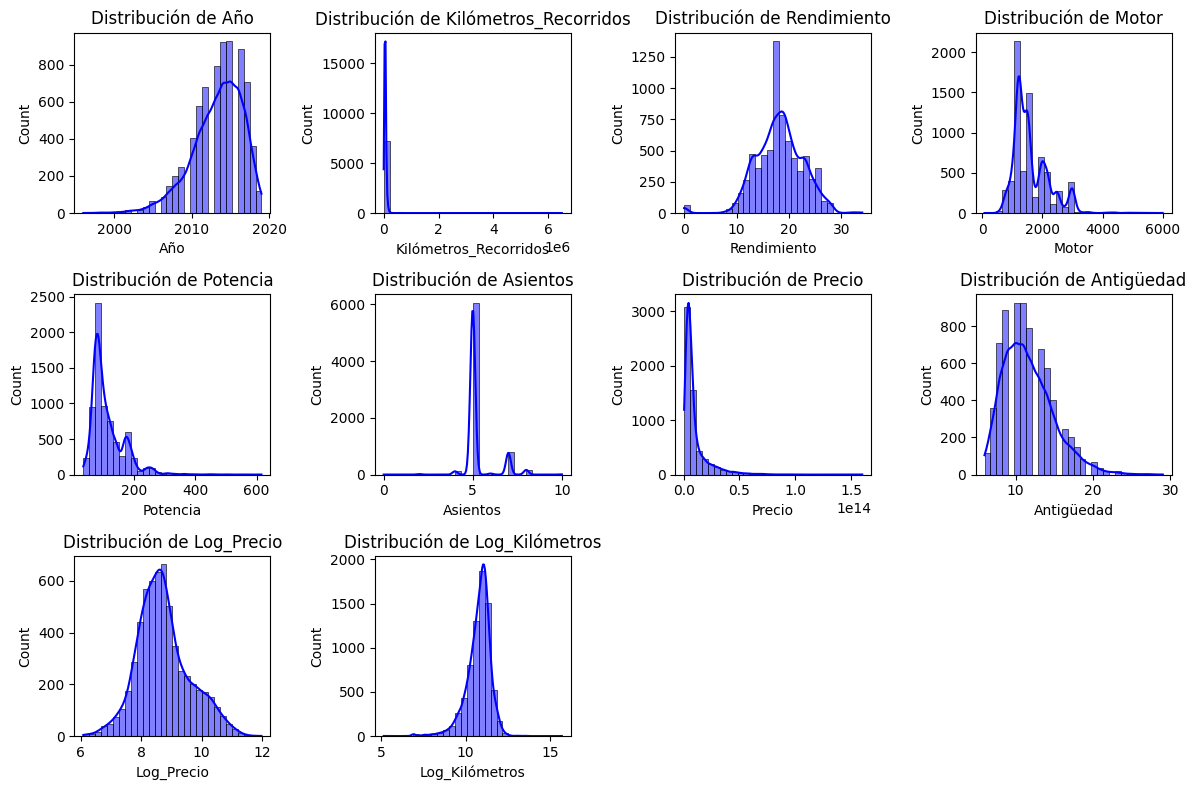

In [154]:
# Visualizacion de la distribucion de variables numericas

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar cada variable numérica con histograma + curva de densidad
for i, columna in enumerate(col_numericas_actualizadas):
    plt.subplot(3, 4, i + 1)  # Crear subgráficos (3 filas, 4 columnas)
    sns.histplot(df[columna], kde=True, bins=30, color="blue", edgecolor="black")
    plt.title(f"Distribución de {columna}")

# Ajustar diseño
plt.tight_layout()
plt.show()

Análisis Bivariado Post-Limpieza:



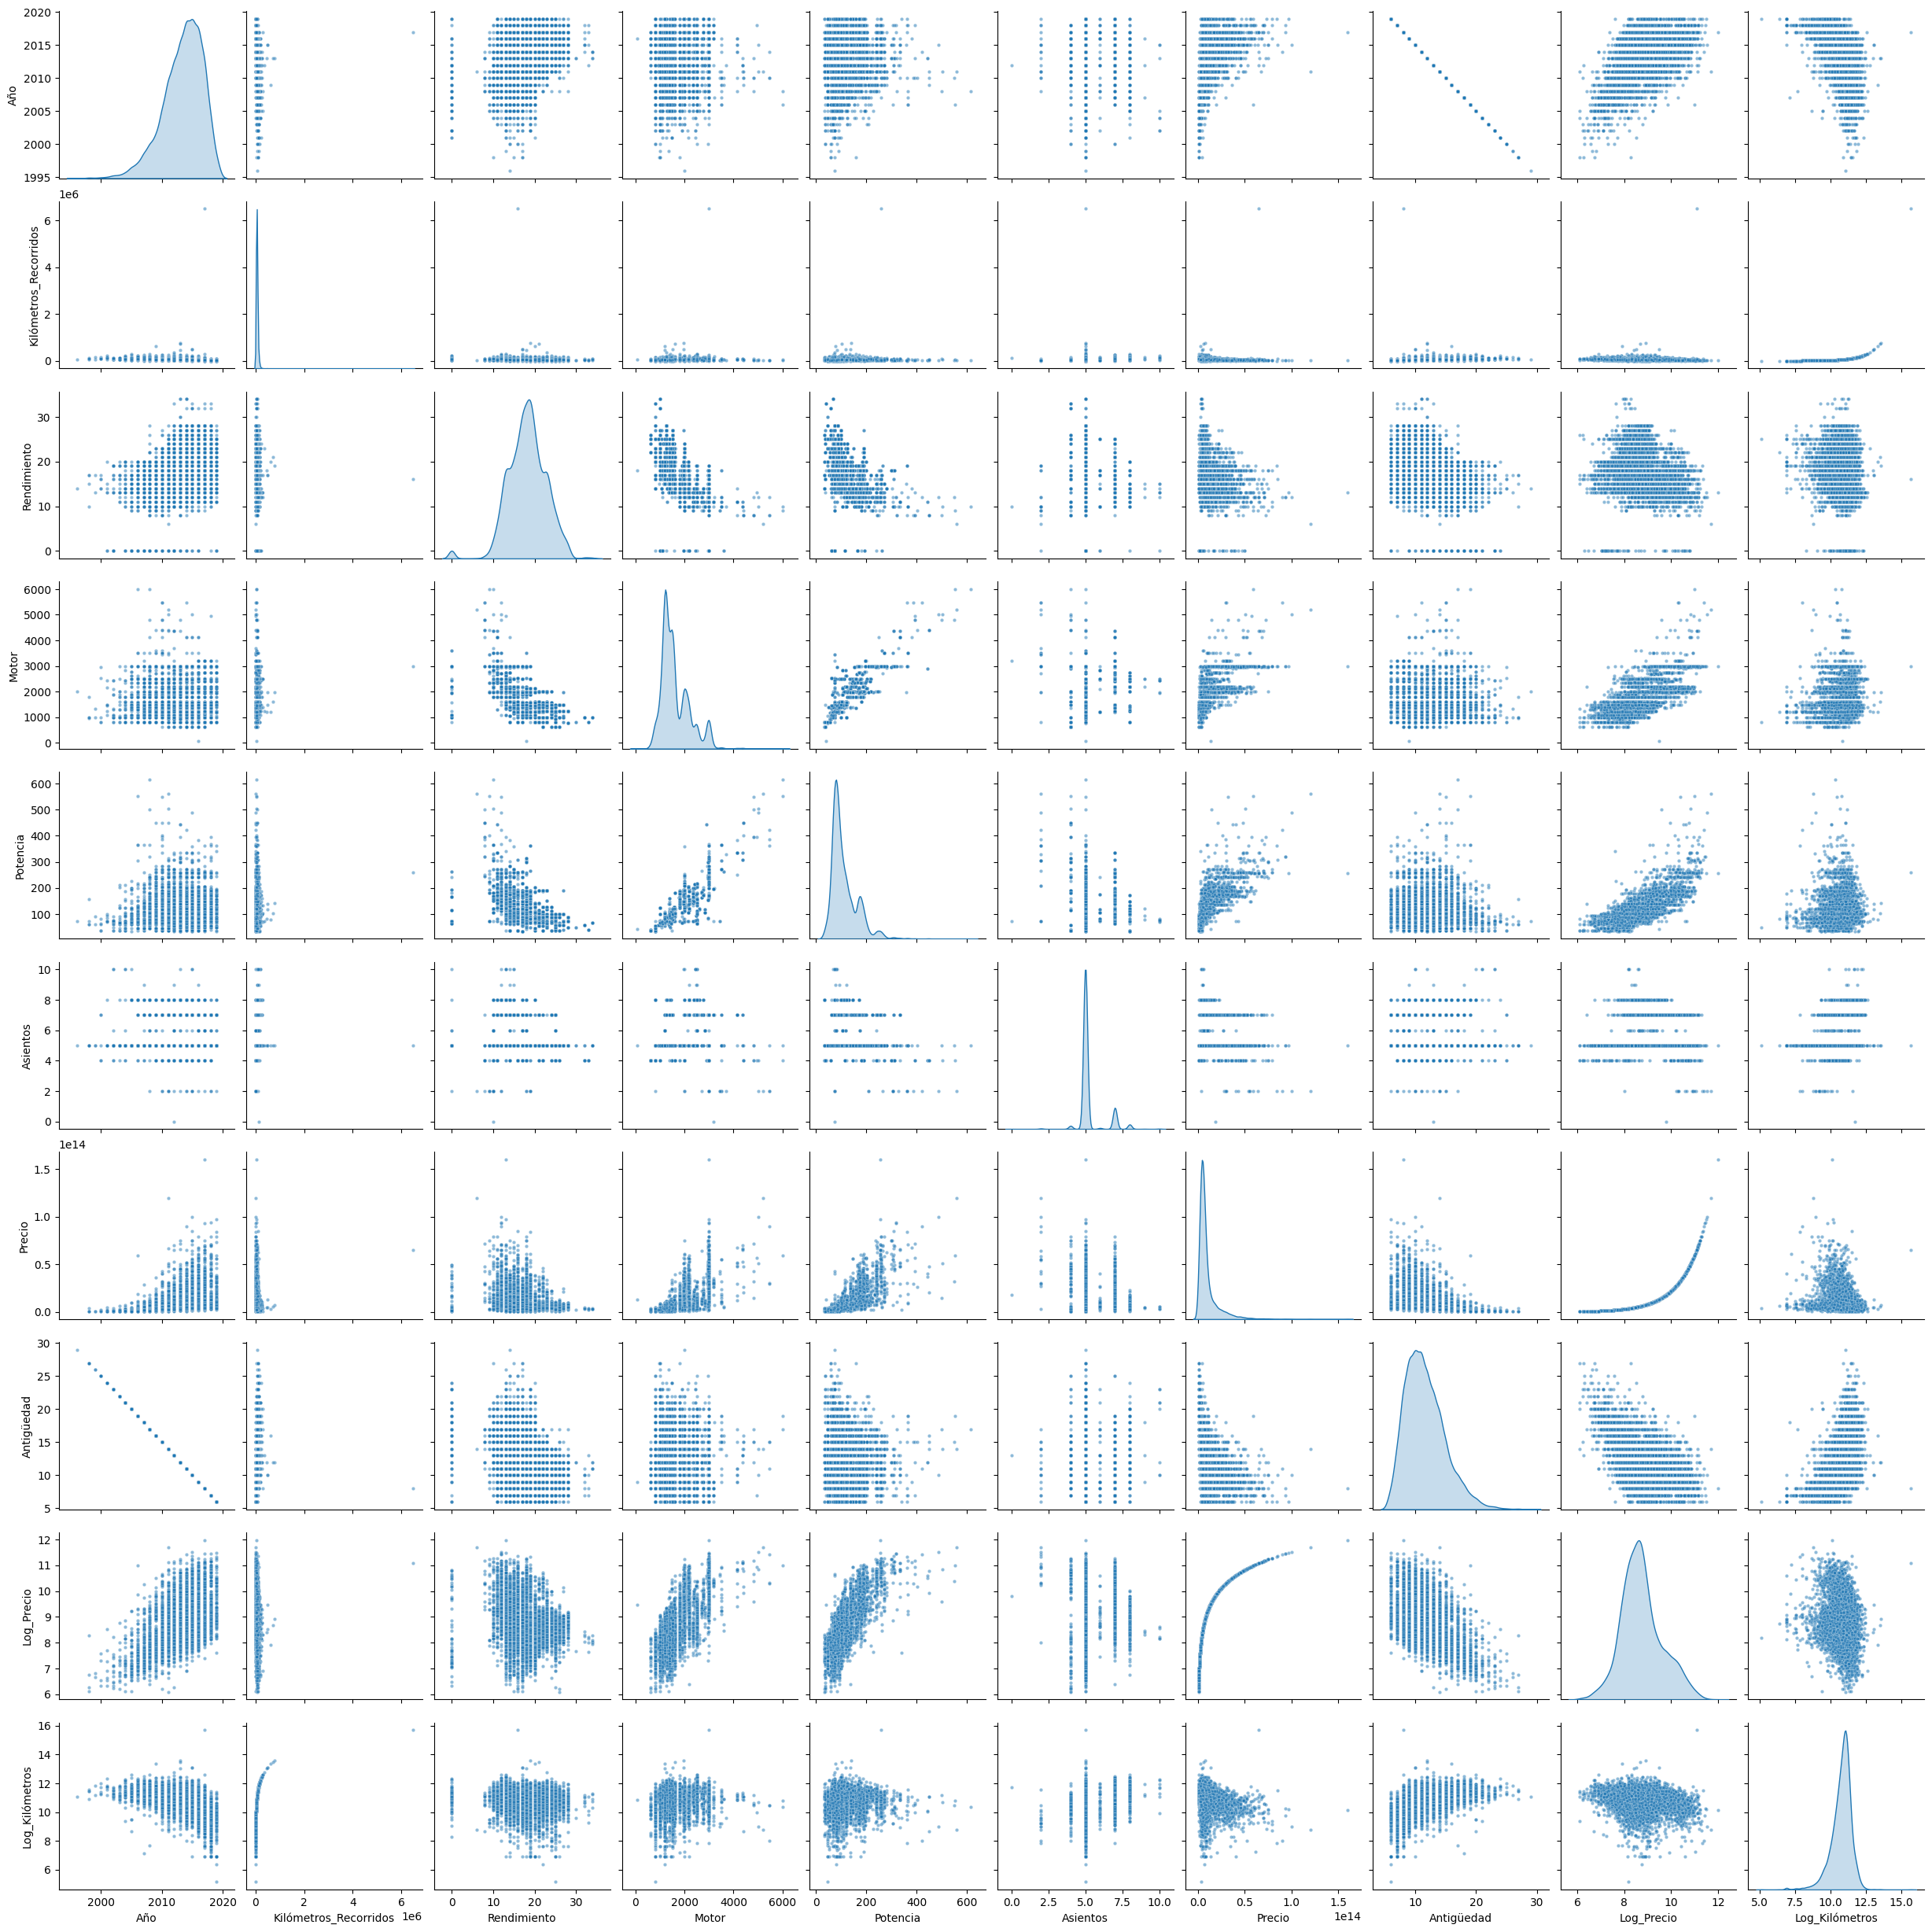

In [155]:
# Comparacion entre variables numericas

# Generar pairplot con las variables numéricas actualizadas
print("Análisis Bivariado Post-Limpieza:\n")
sns.pairplot(df[col_numericas_actualizadas], diag_kind="kde", plot_kws={'alpha': 0.5, 's': 10})
plt.show()

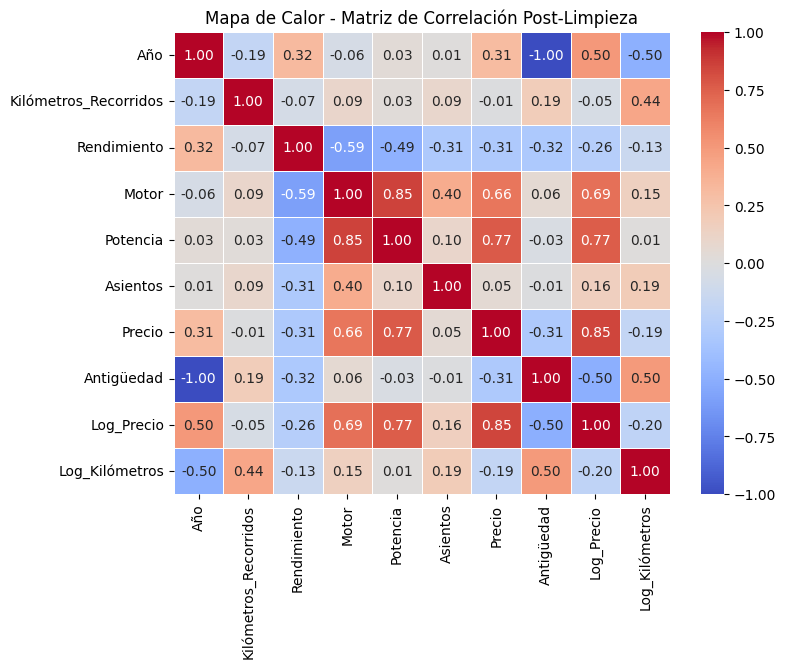

In [156]:
# Matriz de correlacion (Mapa de calor post-limpieza)
# Calcular la nueva matriz de correlación
matriz_correlacion_actualizada = df[col_numericas_actualizadas].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion_actualizada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Matriz de Correlación Post-Limpieza")
plt.show()


# 6. Analisis y Conclusiones
Se deben analizar y contrastar los
resultados obtenidos en los puntos 1 y 5. El análisis debe consistir en identificar las
diferencias en los resultados y argumentar las posibles causas de las mismas.

1. Cambios en las estadísticas numéricas

Durante el análisis inicial de valores nulos, se identificaron las siguientes dimensiones con datos faltantes:

Rendimiento (Mileage): 2 valores nulos
Motor (Engine): 46 valores nulos
Potencia (Power): 46 valores nulos
Asientos (Seats): 53 valores nulos
Precio (Price): 1,234 valores nulos
Precio Nuevo (New_Price): 6,247 valores nulos
Se eliminaron los valores nulos en estas dimensiones mediante imputación o eliminación. En el caso de New_Price, se eliminó la columna por su alto porcentaje de valores faltantes.

La distribución de Kilómetros Recorridos y Precio cambió después del procesamiento, ya que se aplicó una transformación logarítmica, lo que permitió una mejor visualización y reducción de la dispersión.

Se incrementó el número de variables numéricas debido a la transformación y creación de nuevas características.

No se observaron cambios significativos en la media, moda o rango de las variables numéricas, lo que indica que las imputaciones y transformaciones mantuvieron la estructura de los datos.

2. Diferencias en las visualizaciones
Se generaron más visualizaciones en comparación con el análisis inicial, ya que se incorporaron nuevas variables y transformaciones.

La distribución de Kilómetros Recorridos y Precio mejoró tras la transformación logarítmica, permitiendo una interpretación más clara de sus valores.

En el mapa de calor, se observaron más relaciones entre variables y algunas correlaciones se volvieron más evidentes tras la limpieza y transformación de datos.

3. Impacto de la transformación de datos
La creación de nuevas variables aportó información relevante:

Antigüedad mostró una correlación significativa con Año, Rendimiento, Precio y Kilómetros Recorridos, lo que indica que el desgaste del vehículo impacta en su valor y eficiencia.
La separación de Marca y Modelo facilita el análisis de tendencias por fabricante y modelo de auto.
Conclusión General:
El proceso de limpieza, transformación e ingeniería de características mejoró la calidad de los datos, permitió una mejor visualización de las distribuciones y fortaleció el análisis al incorporar nuevas variables con información valiosa.